In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.constants import e, h, c
from scipy.signal import find_peaks
from matplotlib.ticker import MultipleLocator
from scipy.ndimage import gaussian_filter1d

In [68]:
file_path = Path('Data/task 2 profile data.csv')
data = pd.read_csv(file_path, header=None, skiprows=3,sep=';', names=['x', 'y'])
display(data)

,x,y
0,4.025576e-09,6.382200e-09
1,8.051153e-09,6.955077e-09
2,1.207673e-08,6.564841e-09
3,1.610231e-08,7.027174e-09
4,2.012788e-08,7.799727e-09
...,...,...
58,2.375090e-07,7.910960e-09
59,2.415346e-07,7.791947e-09
60,2.455602e-07,7.128282e-09
61,2.495857e-07,5.911212e-09


In [69]:
# Smooth the data with a gaussian smooth
sigma = 1
smoothed_y = gaussian_filter1d(data['y'], sigma=sigma)
a = 1.9909e-9
b = 88.288e-9
c = -0.9342
d = 7.4257e-9

In [76]:
print(data['x'])
print(type(smoothed_y), type(y))

0     4.025576e-09
1     8.051153e-09
2     1.207673e-08
3     1.610231e-08
4     2.012788e-08
          ...     
58    2.375090e-07
59    2.415346e-07
60    2.455602e-07
61    2.495857e-07
62    2.536113e-07
Name: x, Length: 63, dtype: float64
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [82]:
# Find peaks with the find_peaks function from scipy.signal
x, y = data['x'], smoothed_y
threshold = 7e-9
peaks_idx, props = find_peaks(smoothed_y, height=threshold, distance=15)

# Extract corresponding x and y values
peaks_x = x.iloc[peaks_idx]
peaks_y = y[peaks_idx]
peaks = pd.DataFrame({'x': peaks_x, 'y': peaks_y})
peaks = peaks.reset_index(drop=True)
display(peaks)


,x,y
0,4.428134e-08,9.022357e-09
1,1.207673e-07,9.022529e-09
2,2.173811e-07,9.103528e-09


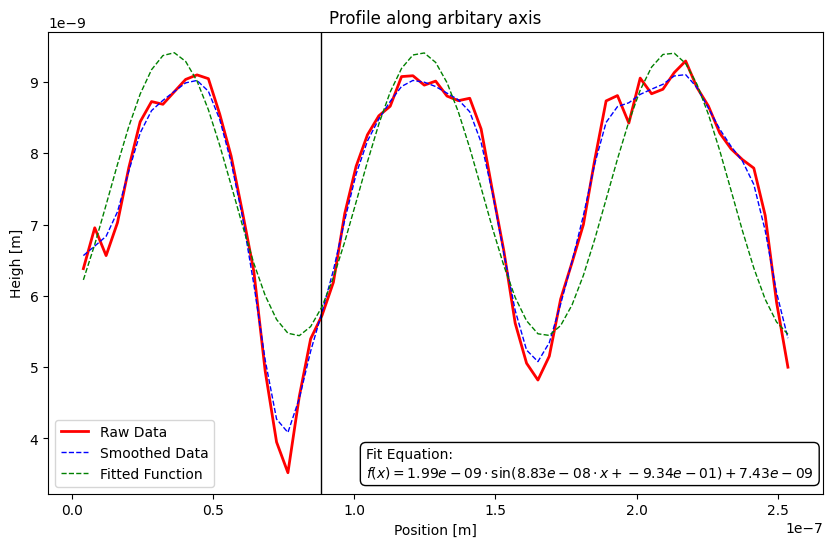

In [ ]:


def fit_function(x, a, b, c, d):
    return a * np.sin(2 * np.pi * x / b + c) + d

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data['x'], data['y'], label='Raw Data',
        color='red', ls='-', lw=2)
ax.plot(data['x'], smoothed_y, label='Smoothed Data',
        color='blue', ls='--', lw=1)
ax.set_title('Profile along arbitary axis')
ax.set_xlabel('Position [m]')
ax.set_ylabel('Heigh [m]')
ax.axvline(x=88.288e-9, color='black', linestyle='-', lw=1)
ax.plot(data['x'], fit_function(data['x'], a, b, c, d), color='green', ls='--', lw=1, label='Fitted Function')
ax.scatter(peaks['x'], peaks['y'], color='blue', label='Smoothed Peaks', marker='.', )
#############################################################
############ Plot the fit function in a text box ############
eq_text = rf'Fit Equation:' +'\n' +  rf'$f(x) = {a:.2e} \cdot \sin({b:.2e} \cdot x + {c:.2e}) + {d:.2e}$'


plt.text(
    0.41, 0.1,
    eq_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top', bbox=dict(boxstyle='round,pad=0.4', fc='white', edgecolor='black')
)

ax.legend()
plt.show()